<a href="https://colab.research.google.com/github/kiplangat-david/Hass-Real-Estate-Consultant/blob/main/Hass_Consulting_Company_kiplangat_david.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`HASS CONSULTING COMPANY`**

# **Analytic Question**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

# **Metric for Success**

This project will be successful when: 

i) We study the factors that affect housing prices using the given information on real estate properties and create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables
 

ii) The model achieves atleast 70% accuracy

iii) Have the lowest RMSE score possible

# **Context**

**What is Real Estate?**

Real estate is property consisting of land, the buildings on it, and any natural resources within the property boundaries, such as waters and crops. Real estate can be categorized into four types: residential, commercial, industrial, and land.

Residential properties include structures for domestic residence such as single-family homes, condominiums, townhouses, mobile homes, and vacation rentals.

Commercial properties include structures used to produce income such as offices, stores, hotels, services and other businesses.

Industrial properties include structures used manufacturing, such as factories, warehouses, and research centers. Generally industrial is for the production of goods and commercial is for the distribution of goods.

Land properties include few or no structures such as vacant land, farms, ranches, and reclaimed sites.

**What Do Hass Consulting Company Do?**

Like other real estate companies Hass Company help people buy and sell homes by providing expertise on the dynamics of the local real estate market, ensuring any transaction follows local laws and regulations, and negotiating on behalf of their client.

It makes money by charging a commission for their services that is usually paid out as a percentage of the final property selling price. This commission is split by the buyer’s and seller’s agent and it is only paid out when a sale is complete.

A common commission in the real estate industry is 5 to 6 percent, though some agents will offer some or all of their services for a flat fee.

# **Experimental Design**

i) Import libraries

ii) Load data

iii) Data cleaning and manipulation

iv) Exploratory Data Analysis

     - Univariate analysis

     - Bivariate analysis

v) Perform regression analysis
      - Multiple Linear Regression

      - Quantile Regression

      - Ridge Regression

      - Lasso Regression

      - Elastic Net Regression

vi) Challenge the solution

vii) Conclusions and recommendations


# **Data Relevance**

We are using housing dataset [[Housing_dataset](http://bit.ly/IndependentProjectWeek7Dataset)]

Zipcodes shows that our dataset was collected from King County, Washington DC in USA.

The dataset contain information on housing such as house price, number of bedrooms, number of bathrooms,square feet living etc. The size and the number features present our dataset makes our dataset sufficient to study the factors affecting housing prices and to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

#**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')




#**Loading Dataset**

In [ ]:
#load and preview first five records
data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#preview bottom 5 records
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#random preview (5 records too)
data.sample(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16154,1454100440,456000.0,4,1.75,1670,9886,1.0,0,0,5,7,1670,0,1947,0,98125,47.7249,-122.287,2590,9997
3727,5469502460,375000.0,4,2.75,3140,24800,1.0,0,0,4,8,2080,1060,1971,0,98042,47.3782,-122.161,2850,12900
2359,128500260,262000.0,4,2.50,2020,6236,2.0,0,0,3,7,2020,0,2002,0,98001,47.2796,-122.247,1940,5076
11499,986000045,240000.0,4,1.75,2020,10332,1.0,0,0,3,7,1010,1010,1954,0,98168,47.5059,-122.303,2240,8379
16789,5029450290,230000.0,3,1.50,1630,6625,1.0,0,0,5,7,980,650,1980,0,98023,47.2900,-122.368,1440,7145


After preview, the records shows that our expected rows and columns are present

In [ ]:
#check dataset shape
print('our dataset contains',data.shape[0],'rows and',data.shape[1],'columns')

our dataset contains 21613 rows and 20 columns


In [ ]:
#check datatypes
data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Datatypes are in the required format for use in our study so we will change any

#**Data Cleaning**

In [ ]:
#check missing values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Our output shows that there are no missing values.

In [ ]:
#check for duplicates
data.duplicated().sum()

3

Duplicates are very few and dropping them will not cost us anything

In [ ]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#Next
#drop 'id' column as it has no effect on house pricing
data.drop('id',axis=1,inplace=True)

Next,

Let's look at distribution of zipcodes in king county,WA. King county have 39 towns and cities and 86 zipcodes. These zipcodes are distributed in the respective towns and cities. A town or a city can have more than one zipcode. For the purpose of our study, we will code zipcodes with the top 4 densely populated cities or towns and code the rest as other cities. This is because research found that a 10 percent increase in local area population is associated with 4–6.5 percent higher house prices.

In [ ]:
# Coding zipcodes with the city they represent

# create a list of our zipcodes
zipcodes = [(data['zipcode'] >= 98000) & (data['zipcode'] <= 98004),
    (data['zipcode'] >= 98004) & (data['zipcode'] <= 98015),
    (data['zipcode'] >= 98016) & (data['zipcode'] <= 98029),
    (data['zipcode'] >= 98030) & (data['zipcode'] <= 98032),
    (data['zipcode'] >= 98033) & (data['zipcode'] <= 98054),
    (data['zipcode'] >= 98055) & (data['zipcode'] <= 98059),
    (data['zipcode'] >= 98060) & (data['zipcode'] <= 98099),
    (data['zipcode'] >= 98100) & (data['zipcode'] <= 98199),
    ]

# create a list of the cities we want to assign for each zipcode
city = ['other_cities','Bellevue','other_cities','Kent','other_cities','Ranton','other_cities','Seattle']

# create a new column and use np.select to assign values to it using our lists as arguments
data['city'] = np.select(zipcodes, city)

# display updated DataFrame
data.head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,other_cities
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,other_cities


**Outliers**

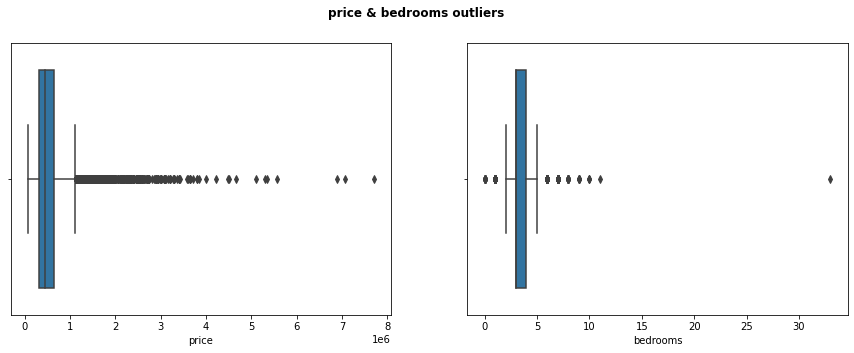

In [ ]:
#outliers showing pricing and bedrooms
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('price & bedrooms outliers',weight='bold')
sns.boxplot(ax=axes[0],x=data['price'])
sns.boxplot(ax=axes[1],x=data['bedrooms'])

The median price is approximately 0.5M. However, some are as expensive as 8M depending on many factors such as location,condition,waterfront etc and so we will not drop the outliers

On the other hand,number of bedrooms outliers has zero & aa voalue more than 30. In the real estate world, a space with no bedroom can be considered a bedroom if it has a door that can be closed, a window, and a closet. Again,
Lynnewood Hall which is ranked as the largest home for sale in the United States has 55 bedrooms. These dhows that the outliers could be true observations and therefore we will not drop them.

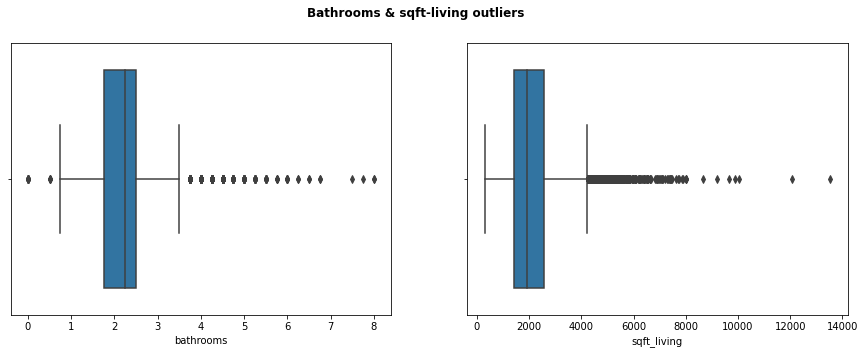

In [ ]:
#outliers showing bathrooms and squarefeet living
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Bathrooms & sqft-living outliers',weight='bold')
sns.boxplot(ax=axes[0],x=data['bathrooms'])
sns.boxplot(ax=axes[1],x=data['sqft_living'])

The number of bathrooms have outliers at zero & maximum of 8. This is possible depending on the home type,living space etc and so we will not drop. This applies to the square feet living too

#**Exploratory Data Analysis**

In [ ]:
#general statistics
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0.5, 15.440000000000026, 'No. of bedrooms')

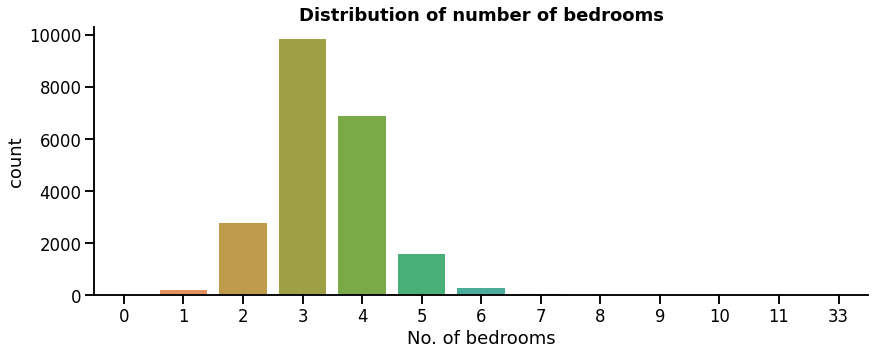

In [ ]:
#factorplot showing distribution of the number of bedrooms
sns.factorplot(x='bedrooms',data=data,kind='count',aspect=2.5)
sns.set_palette('hot_r')
plt.title('Distribution of number of bedrooms',weight='bold')
plt.xlabel('No. of bedrooms')

Most houses are 3 bedroom which is ideal for a real estate investment as its plan perfectly uses the available land size and is quite handsome in an urban setting

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

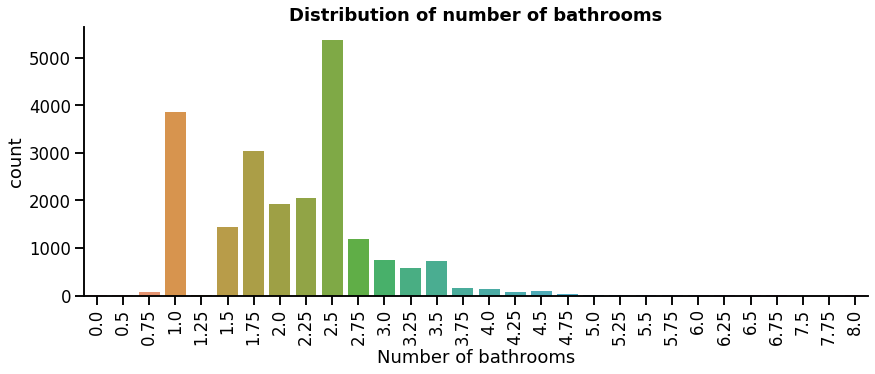

In [ ]:
    #factorplot showing distribution of number of bathrooms
    sns.factorplot(x='bathrooms',data=data,kind='count',aspect=2.5)
    plt.title('Distribution of number of bathrooms',weight='bold')
plt.xlabel('Number of bathrooms')
plt.xticks(rotation=90)

2.5 bathrooms dominate in the distribution. This is the average ratio of bathrooms in a 3 bedroom house

Text(0.5, 1.0, 'Distribution of cities')

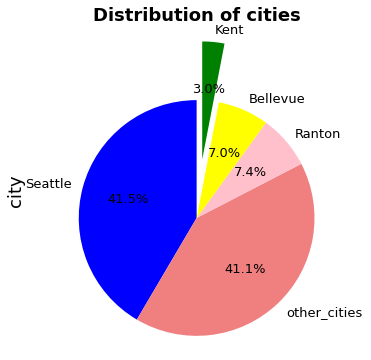

In [ ]:
#pie chart showing distribution of cities
colors = ['blue','lightcoral','pink','yellow','green']
data['city'].value_counts().plot(kind='pie',figsize=(6,6),fontsize=13,autopct='%1.1f%%',explode=(0, 0,0,0,0.5),colors=colors,startangle=90);

plt.axis('equal')
plt.title('Distribution of cities',weight='bold')

Seattle city tops in the distribution. Seattle is consistently ranked among the 10 best places to live in the United States by U.S. News, and for good reason. Not only is Seattle surrounded by lush evergreen forests, but the city is famous for being environmentally friendly. Plus, its residents earn above-average incomes.
It is also a seat of king county

Text(0.5, 15.440000000000026, 'No. of floors')

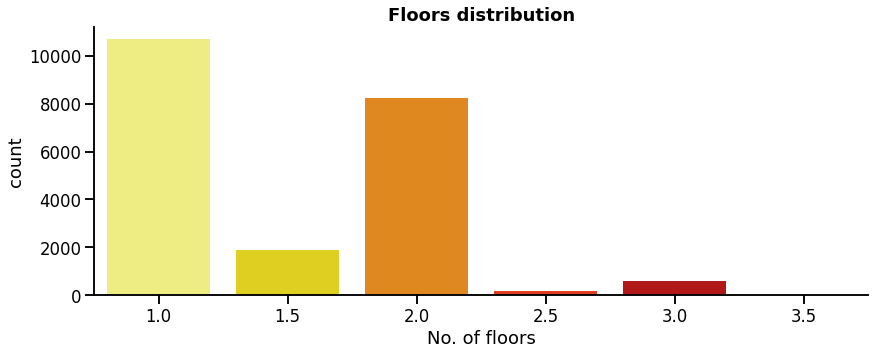

In [ ]:
#factorplot showing number of floors
sns.factorplot(x='floors',data=data,kind='count',aspect=2.5)
plt.title('Floors distribution',weight='bold')
plt.xlabel('No. of floors')

Single floor houses are more compared to others. People love living in single floor houses because of reasons such as fewer risks of falls and accident, convenient for the aged, easier maintenance and renovations

Text(0.5, 15.440000000000026, '0:waterfront absent| 1:waterfront present')

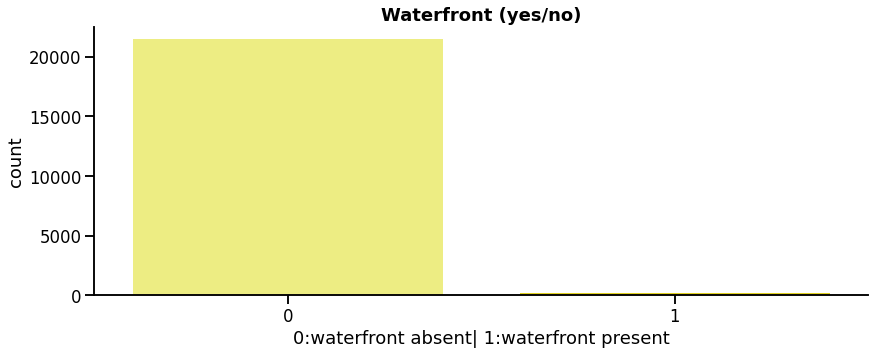

In [ ]:
#factorplot showing distribution of waterfront
sns.factorplot(x='waterfront',data=data,kind='count',aspect=2.5)
sns.set_context('talk')
sns.set_palette('hot_r')
plt.title('Waterfront (yes/no)',weight='bold')
plt.xlabel('0:waterfront absent| 1:waterfront present')

Here zero means no waterfront and one indicate presence of a waterfront. Huge proportion indicate no waterfront. Lake washington which is adjacent to Seattle city is the only major waterfront in king county 

Text(0.5, 15.440000000000026, 'No. of views')

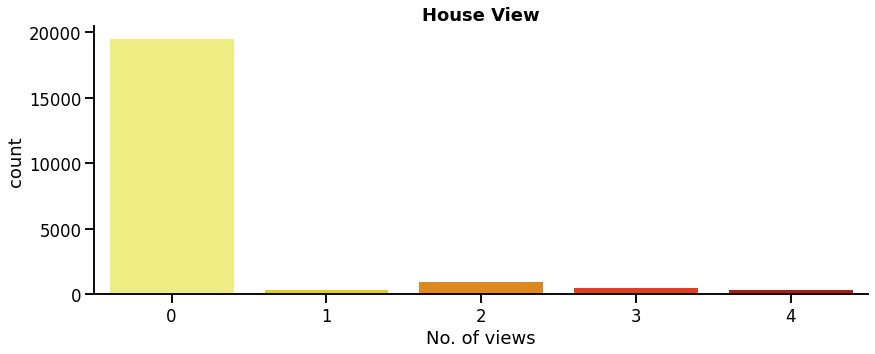

In [ ]:
#factorplot showing distribution of the number of views
sns.factorplot(x='view',data=data,kind='count',aspect=2.5)
plt.title('House View',weight='bold')
plt.xlabel('No. of views')



huge proportiion represent zero number of views maybe because of geographical reasons.

Text(0.5, 1.0, 'House Condition')

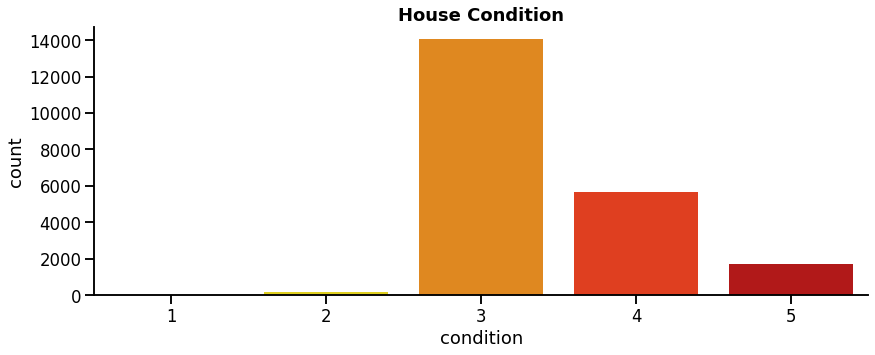

In [ ]:
#factor pplot showing distributio of house condition
sns.factorplot(x='condition',data=data,kind='count',aspect=2.5)
plt.title('House Condition',weight='bold')


Huge proportio represents houses with 3 condition

Text(0.5, 1.0, 'House Grade')

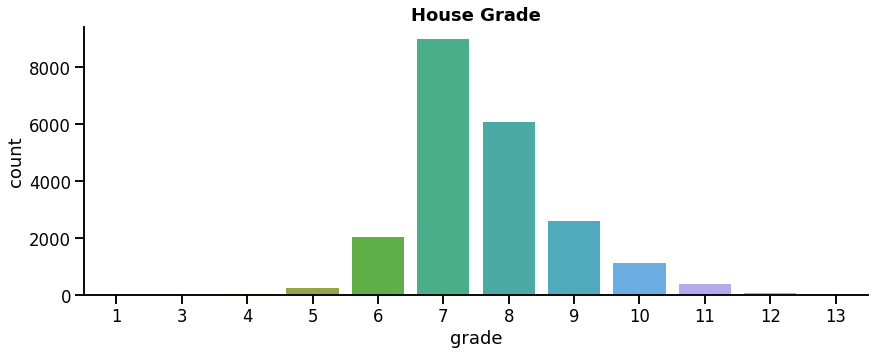

In [ ]:
#factorplot showing house grade distribution
sns.factorplot(x='grade',data=data,kind='count',aspect=2.5)
plt.title('House Grade',weight='bold')


Grade 7 houses dominate 

Text(31.189999999999998, 0.5, 'Price in Millions')

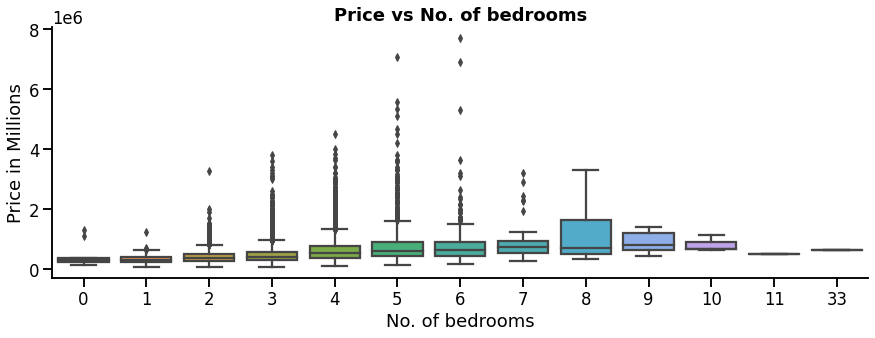

In [ ]:
#factorplot showing relationship between price and the no. of bedrooms
sns.factorplot(x='bedrooms',y='price',data=data,kind='box',aspect=2.5)
plt.title('Price vs No. of bedrooms',weight='bold')
plt.xlabel('No. of bedrooms')
plt.ylabel('Price in Millions')

The minimum price of a house is approximately 0.1 million and seems to increase with increase in number of bedrooms. However other factors such as location,waterfront etc comes in that is why pricing is not consistent

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

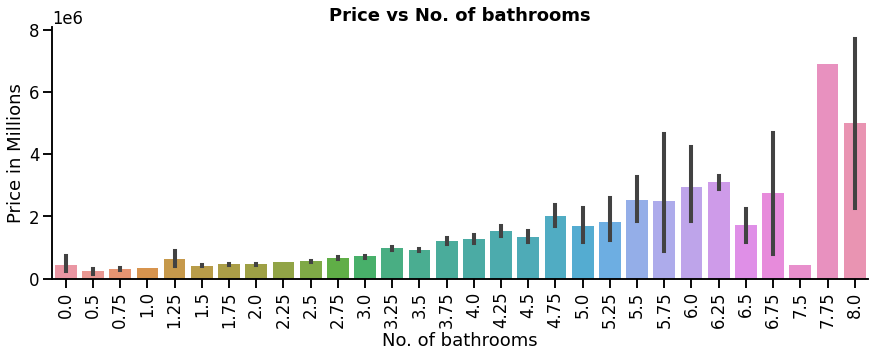

In [ ]:
#factorplot showing r/ship between price and o. of bathrooms
sns.factorplot(x='bathrooms',y='price',data=data,kind='bar',aspect=2.5)
plt.title('Price vs No. of bathrooms',weight='bold')
plt.xlabel('No. of bathrooms')
plt.ylabel('Price in Millions')
plt.xticks(rotation=90)

Pricing follows the same distribution as number of bedrooms 

Text(47.01379499999999, 0.5, 'Price in Millions')

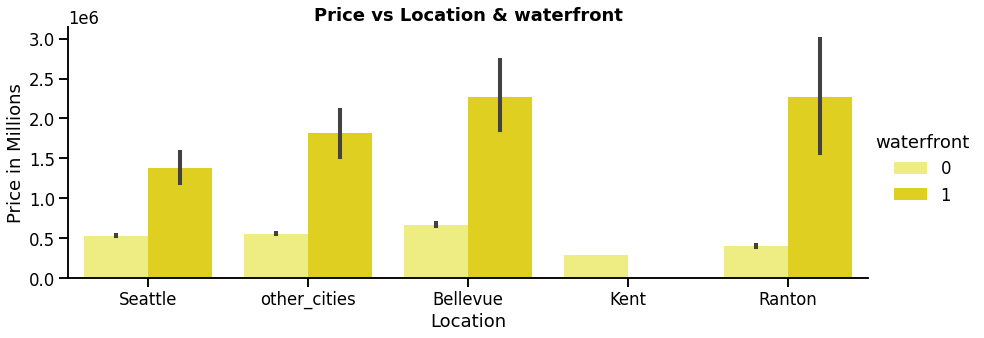

In [ ]:
#r/ship btw house price & location & whether it has waterfront or not
sns.catplot(x='city',y='price',data=data,hue='waterfront',kind='bar',aspect=2.5)
plt.title('Price vs Location & waterfront',weight='bold')
plt.xlabel('Location')
plt.ylabel('Price in Millions')

Generally housing is expensive in Bellevue. The high growth in  with heavy investment from commercial construction makes housing and living premium here.

Houses with waterfronts are more expensive by a bigger percentage. Waterfront homes are desirable to many people, meaning there is great demand for them. So with waterfront property, the supply is low. High demand plus low supply equals high cost

Text(43.66808999999998, 0.5, 'Price in Millions')

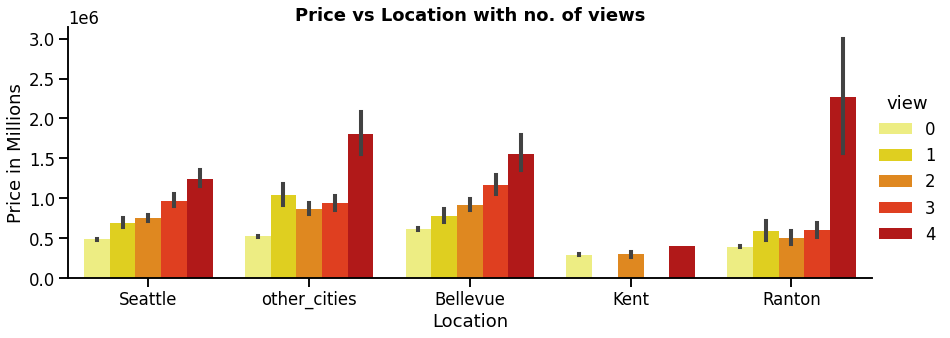

In [ ]:
#r/ship btw house price & location & no.of views
sns.catplot(x='city',y='price',data=data,hue='view',kind='bar',aspect=2.5)
plt.title('Price vs Location with no. of views',weight='bold')
plt.xlabel('Location')
plt.ylabel('Price in Millions')

Houses with maximum views are generally expensive. Price increase with the quality and the excellence of the views 

Text(49.97207000000003, 0.5, 'Price in Millions')

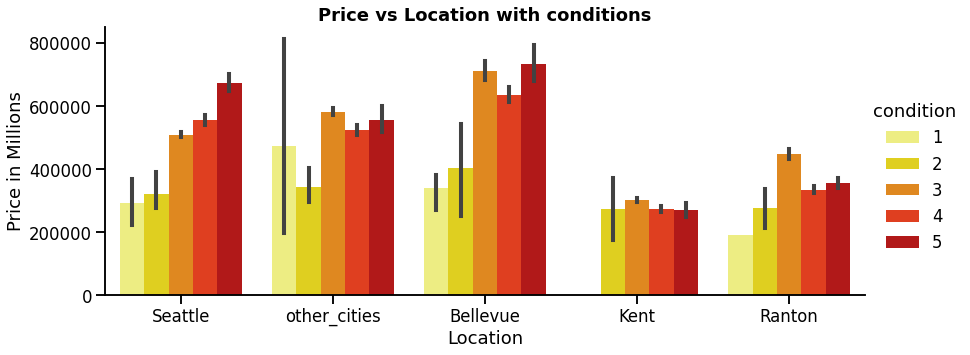

In [ ]:
#r/ship btw house price & location & condition
sns.catplot(x='city',y='price',data=data,hue='condition',kind='bar',aspect=2.5)
plt.title('Price vs Location with conditions',weight='bold')
plt.xlabel('Location')
plt.ylabel('Price in Millions')

Text(45.07141499999999, 0.5, 'Price in Millions')

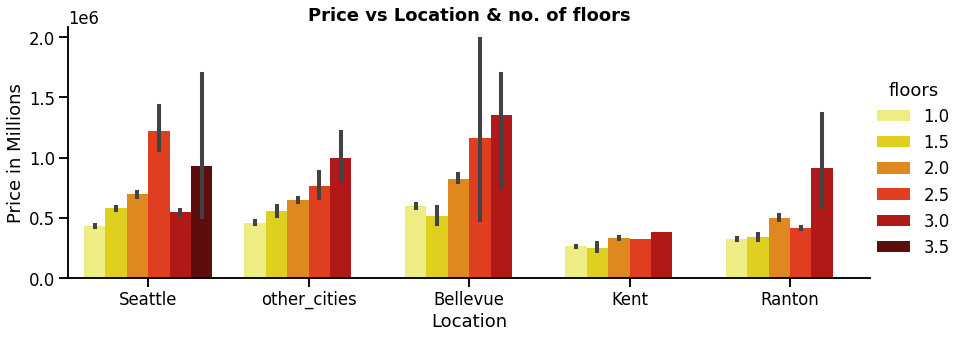

In [ ]:
#r/ship btw house price & location & with respect to the no. of floors
sns.catplot(x='city',y='price',data=data,hue='floors',kind='bar',aspect=2.5)
plt.title('Price vs Location & no. of floors',weight='bold')
plt.xlabel('Location')
plt.ylabel('Price in Millions')

Prices generally increases with with the number of floors

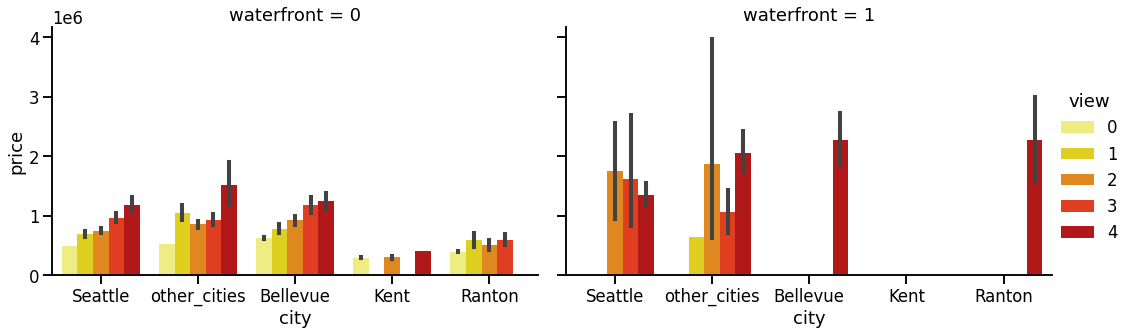

In [ ]:
#r/ship btw house price & location with respect to the no. of views
#and whetehr it has waterfronts or not

sns.catplot(x='city',y='price',data=data,hue='view',col='waterfront',kind='bar',aspect=1.5)



- Houses with waterfront are expensive

-Most houses with maximum views are expensive

Text(0.5, 0, 'sqft_living15')

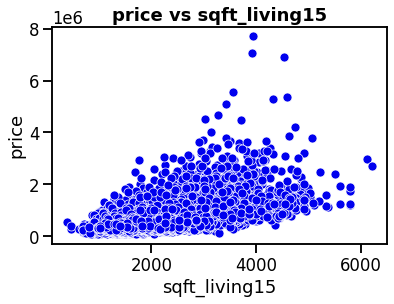

In [ ]:
#scatterplot showwing sqft_living15
sns.scatterplot(data['sqft_living15'],data['price'])
sns.set_context('talk')
sns.set_palette('flag_r')
plt.title('price vs sqft_living15',weight='bold')
plt.xlabel('sqft_living15')

Text(0.5, 1.0, 'Correlation Heatmap')

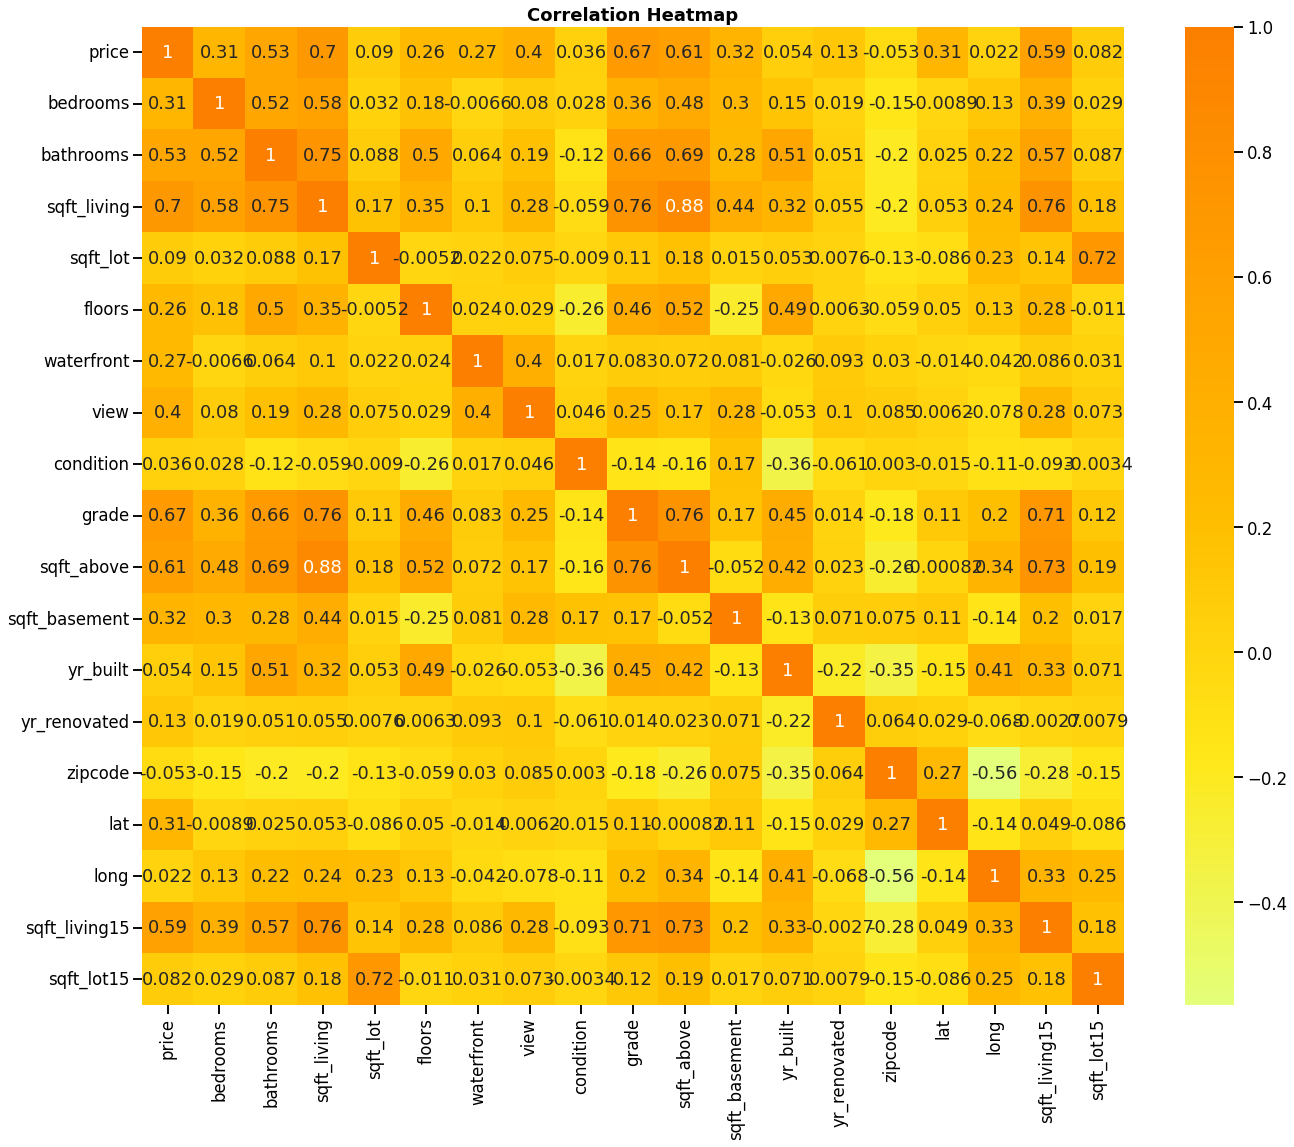

In [ ]:
#heatmap showing correlation between factors affecting  house pricing
plt.figure(figsize=(22,18))
sns.heatmap(data.corr(method='pearson'),annot=True,cmap = 'Wistia')
plt.title('Correlation Heatmap',weight='bold')


- The tabe above shows how each variable relates to another.

- The coefficient of 1 across the diagonal shows that a variable is perfectly correlated to itself

- featuress such as sqft_living & sqft_above, sqft_lot & sqft_lot15, sqft_living15 & sqft_above, sqft_living & sqft_living15 have strong positive correlation

- other features have moderate correlation
- zipcode and years show weak correlations with the other features

#**Regression Analysis**

we will use 5 approaches here

1. Multiple Linear Regression

2. Quantile Regression

3. Ridge Regression

4. Lasso Regression

5. Elastic Net Regression

We will perform modeling using the above regression techniques then evaluate their performance

#**1. Multiple Linear Regression**

Multiple linear regression is the extension of simple linear regression model.
It is used when more than one independent variable is present in the data

In [ ]:
#check data for use
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#check for multicollinearity
#corr
cor = data.drop('price', axis = 1).corr()
cor

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_lot,0.031703,0.087740,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,0.303093,0.283770,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.

In [ ]:
#  VIF dataframe
#
vif = pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns = cor.columns)
vif

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652063,-0.461171,0.049361,0.049695,0.063235,0.114111,-0.050767,0.307048,-0.875155,-0.484386,0.134498,0.045454,0.080112,0.050789,0.017395,0.025213,0.085400
bathrooms,-0.461171,3.350793,-0.024127,-0.675075,0.009760,-0.041645,-0.137020,-0.268005,-1.273253,-1.079497,-0.935779,-0.259782,0.041796,-0.040956,0.054055,0.092133,0.071471
sqft_lot,0.049361,-0.024127,2.102522,0.045263,0.027310,-0.058998,0.030561,-0.053851,-0.199364,-0.042601,0.098762,0.021443,-0.002610,0.053366,-0.133162,0.163944,-1.459319
floors,0.049695,-0.675075,0.045263,2.011907,-0.005281,-0.040627,0.089673,-0.230851,-0.504302,0.615308,-0.481480,-0.080603,-0.170766,-0.127637,0.164067,0.272617,0.072658
waterfront,0.063235,0.009760,0.027310,-0.005281,1.203766,-0.492545,-0.012670,0.049240,-0.112096,-0.003697,-0.021050,-0.065403,0.022551,0.009896,0.027438,0.054452,-0.018470
view,0.114111,-0.041645,-0.058998,-0.040627,-0.492545,1.435160,-0.021475,-0.185237,0.039551,-0.256427,0.151620,-0.040236,-0.140679,0.118486,0.071508,-0.325615,-0.007493
condition,-0.050767,-0.137020,0.030561,0.089673,-0.012670,-0.021475,1.249475,-0.054454,0.055562,-0.097502,0.561549,0.206672,0.161268,0.063674,-0.007029,0.075861,-0.028255
grade,0.307048,-0.268005,-0.053851,-0.230851,0.049240,-0.185237,-0.054454,3.417046,-1.609699,-0.486330,-0.638980,-0.071422,0.083321,-0.330869,0.393834,-0.911603,0.071874
sqft_above,-0.875155,-1.273253,-0.199364,-0.504302,-0.112096,0.039551,0.055562,-1.609699,4.923354,1.337105,0.519984,-0.000925,-0.075718,0.181070,-0.341680,-1.535711,-0.175720
sqft_basement,-0.484386,-1.079497,-0.042601,0.615308,-0.003697,-0.256427,-0.097502,-0.486330,1.337105,2.010143,0.245288,-0.013996,-0.081334,-0.081171,0.147778,-0.471131,-0.059570


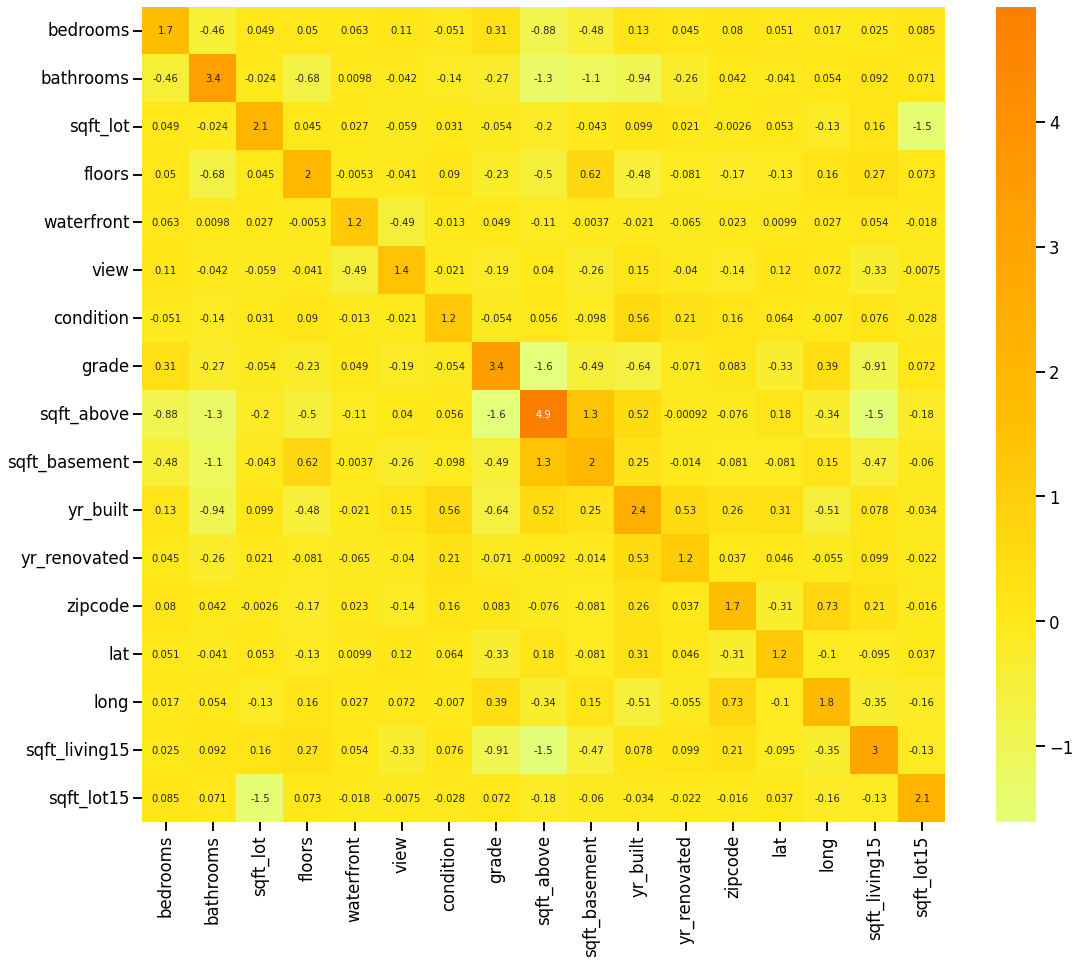

In [ ]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (18, 15))
sns.heatmap(vif, annot = True,cmap = 'Wistia')
plt.show()

The VIF score for each variable is found alongside the downwards sloping diagonal. All of this scores are under 5, therefore there is no multicollinearity

In [ ]:
# Creating X and y variables
#
X = data.drop(['price'],1)
y = data['price']

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 200)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print('RMSE = ',np.sqrt(mean_squared_error(y_test, y_pred)))

print('********************************\n')
print('Dataframe showing actual and the predicted values\n')
#create a dataframe showing actual and predicted values
predict = pd.DataFrame({'actual':y_test,'predicted':y_pred})
predict


RMSE =  190594.90222467866
********************************

Dataframe showing actual and the predicted values



,actual,predicted
17384,297000.0,3.783754e+05
722,1580000.0,1.540515e+06
2680,562100.0,5.445618e+05
18754,631500.0,5.779767e+05
14554,780000.0,9.803160e+05
...,...,...
5427,844000.0,9.661871e+05
16547,335500.0,4.614823e+05
4585,369950.0,3.597607e+05
17762,300000.0,2.068983e+05


Next,

we check the appropriateness of the model using a residual plot
A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

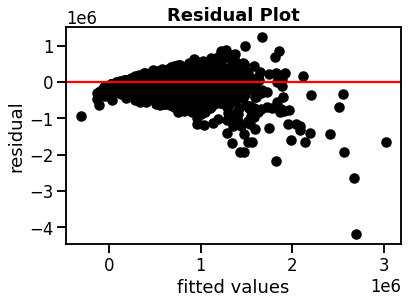

In [ ]:


#Checking the appropriateness of the model using a residual plot
#
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot',weight='bold')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

The residuals are centered around a mean that is very close to 0. The distribution is somehow random which shows that the model is fairly good

**Heteroskedasticity test using the barlett's test**

The concept of heteroscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

The barlett's test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints

In [ ]:
# Performing the barlett's test
#
import scipy.stats as stats
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculate the critical value of the chi squared distribution
#and compare it with the test_result
#
#
df = len(y_pred) - 1
prob =  1 - p_value
critical_value = sp.stats.chi2.ppf(prob, df)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 1016.84 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


#**Quantile Regression**

Quantile regression is an extension of linear regression that is used when the conditions of linear regression are not met (i.e., linearity, homoscedasticity, independence, or normality).

In [ ]:
#Quantile regression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

x = data.drop(['price'],1)
y = data['price']

sc = StandardScaler()
sc.fit_transform(x)


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state=0)



In [ ]:
mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4742
Model:                       QuantReg   Bandwidth:                   1.946e+04
Method:                 Least Squares   Sparsity:                    2.640e+05
Date:                Sat, 27 Nov 2021   No. Observations:                21613
Time:                        14:47:07   Df Residuals:                    21595
                                        Df Model:                           17
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    351.1642      4.163     84.360      0.000     343.005     359.323
x[0]       -2.041e+04   1238.608    -16.480      0.000   -2.28e+04    -1.8e+04
x[1]        2.947e+04   2133.795     13.810      0.000    2.53e+04    3.36e+04
x[2]           0.2096      0.031      6.675      0.0

In [ ]:
x = data.drop(['price'],1)
y = data['price']
mod = smf.quantreg('y~x',data).fit(q=.75)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.5576
Model:                       QuantReg   Bandwidth:                   2.249e+04
Method:                 Least Squares   Sparsity:                    8.439e+05
Date:                Sat, 27 Nov 2021   No. Observations:                21613
Time:                        16:38:20   Df Residuals:                    21595
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       101.6396      9.146     11.113      0.000      83.714     119.566
bedrooms      -4.407e+04   3279.728    -13.436      0.000   -5.05e+04   -3.76e+04
bathrooms      2.351e+04   4576.706      5.137      0.000    1.45e+04    3.25e+04
sqft_lot          0.3163      0.056  

#**3. Lasso Regression**

In [ ]:
#
#splitting the dataset
X = data.drop(['price'],1)
y = data['price']

#Encoding using one hot encoding
X=pd.get_dummies(X,drop_first=True)

# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#set train and test datsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=200)
parameters = {'alpha': np.concatenate((np.arange(1,2,0.1), np.arange(2, 4, 0.5), np.arange(4, 10, 1)))}

lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [ ]:
# Fit models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 

print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 9.0}
lasso score: 0.6882809248725479
lasso MSE: 44829266610.69573
lasso best estimator coef: [-29044.96747754  34111.49852093   2660.91603514   3184.71169722
  50275.66026108  43208.03910854  17573.45262333 115211.73974238
 141976.35617249  59402.00026738 -77917.41900891   6982.15041439
 -30059.77275193  81680.11550799 -30671.90658601  17663.00644927
  -8010.78452924]


Our best alpha here is 9.0 and our model has a score of 68.83% which is fairly good.We will now train our model feeding our best alpha and evaluate


In [ ]:
#fit
lasso = Lasso(normalize=True,alpha=9.0)
lasso.fit(X_train, y_train)
print("lasso score:", lasso.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test)))
print("r squared:", r2_score(y_test, lasso.predict(X_test)))

lasso score: 0.6873166757947009
lasso MSE: 44967938198.157135
r squared: 0.6873166757947009


our r squared score is 68.73% which is fairly good

#**4. Ridge Regression**

Ridge Regression is a technique used when the data suffers from multicollinearity (independent variables are highly correlated)

In [ ]:
#ridge
x = data.drop(['price'],1)
y = data['price']

sc = StandardScaler()
x = sc.fit_transform(x)
ridge = Ridge(normalize=True)
gs = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},\
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
gs.fit(x,y)
print('best_score :',gs.best_score_)
print('best_param :',gs.best_params_)


best_score : -41017919825.82103
best_param : {'alpha': 0.01}


In [ ]:
#fit best param
ridge = Ridge(normalize=True,alpha=.01)
ridge.fit(x,y)
y_pred = ridge.predict(x)
print('RMSE =',np.sqrt(mean_squared_error(y,y_pred)))
print('accuracy',ridge.score(X_test,y_test))

RMSE = 201321.3397529204
accuracy 0.6894480053360569


Like lasso regression,Our accuracy is 68.94% which is again fairly good

#**5. ElasticNet Regression**

ElasticNet is hybrid of Lasso and Ridge Regression techniques. It is trained with L1 and L2 prior as regularizer. Elastic-net is useful when there are multiple features which are correlated

In [ ]:
#elastic
#split data
X = data.drop(['price'],1)
y = data['price']

#encode
X = pd.get_dummies(X, drop_first=True)

#scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#set train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=101)

#elastic net
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize=True)

#gridsearch for best alphas
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

#train model
gs.fit(X,y)

#make predictions
y_pred = gs.predict(X_test)

In [ ]:
#evaluations

print('best_params',gs.best_params_)
abs(gs.best_score_)

best_params {'alpha': 1e-05, 'l1_ratio': 0.8}


41109837982.141495

Our best alpha for this case is 1e-05 and l1_ratio is 0.8. tis mean that the mixing value for lasso and ridge regression is 80:20 respectively. 

we will proceed and train our our model with these best parameters

In [ ]:
#best parameters
#alpha=1e-05,l1_ratio=0.8
#now apply
elastic = ElasticNet(normalize=True,alpha=1e-05,l1_ratio=.8)
elastic.fit(X,y)

#
import numpy as np
from sklearn import metrics
print('mse',metrics.mean_squared_error(y_test,elastic.predict(X_test)))
print('accuracy',elastic.score(X_test,y_test))


mse 41142906143.7911
accuracy 0.7070949935455192


Our accuracy here is 70.71% which achieved our minimum metric and therefore our model is good. This shows that for this case ElasticNet regression model is the best model compared to multiple regression,quantile,ridge and lasso regressions.

# **`Follow up questions`**

i). Did we have the right data?

yes our data was right and relevant the study

ii). Do we need other data to answer our question?

yes more conclusive features such as government policies,economic factors should be included

iii). Did we have the right question?

yes, Real estate plays an integral role in the country's economy. Residential real estate provides housing for families. It's the greatest source of wealth and savings for many people. Commercial real estate, which includes apartment buildings, creates jobs and spaces for retail, offices, and manufacturing and therefore studying real estate question was a right question for us.

#**Conclusions**

i) 3 bedroom homes are ideal for a real estate investment as its plan perfectly uses the available land size and is quite handsome in an urban setting

ii) **Location** is key to valuable real estate. Homes in cities that have little room for expansion tend to be more valuable than those in cities that have plenty of room.

-accessibility, appearance, and amenities of a neighborhood as well as plans for development.

-A lot's proximity to things like busy roadways and community centres

iv) single floor homes are preferable because of reasons such as fewer risks of falls and accident, convenient for the aged, easier maintenance and renovations

v) other factors such as quality and excellent views,economic developments,waterfront, friendly environment also affect house pricing 

#**Recommendations**

i) The condition and price of any home can be changed. The size of the house can also be changed. The one whicch cannot be changed is the home's location.

The location creates desirability, desirability creates demand, and demand raises real estate prices. Therefore real estates should invest in locations that can generate positive cash flow, build equity and appreciate over time

ii) more coclusive and important features such as economic developments and government policies should be included in the training of the predictive model, which is the ElasticNet for this case